In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from custom_functions.LearningAlgorithms import ClassificationAlgorithms
import seaborn as sns
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix


# Plot settings
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["lines.linewidth"] = 2


In [8]:

# --------------------------------------------------------------
# Create a training and test set
# --------------------------------------------------------------

df = pd.read_pickle("../../data/interim/03_data_features.pkl")
df

,gyr_x,acc_x,acc_y,acc_z,gyr_y,gyr_z,label,category,participant,set,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.531558,-0.011983,0.082301,-0.022110,-2.253640,-1.017343,bench,heavy,B,64.0,...,0.384696,91.909046,-8.270859,-25.336859,-8.894184,-5.152016,4.727491,-0.404182,-2.590985,4
2019-01-11 15:08:08.400,14.125240,0.013777,-0.009807,-0.035079,0.963330,-7.388610,bench,heavy,B,64.0,...,0.209355,116.676466,-8.619306,0.267141,6.879562,-10.705532,-10.147970,-9.049099,-7.875019,2
2019-01-11 15:08:08.800,0.103646,-0.001622,-0.041715,0.008536,-1.180369,0.008532,bench,heavy,B,64.0,...,0.364438,120.634088,-24.868121,2.487857,-23.938178,9.828233,-1.470122,-1.908406,-1.894240,1
2019-01-11 15:08:09.200,0.384317,0.004326,0.018191,0.004011,0.543648,-1.697610,bench,heavy,B,64.0,...,0.586554,113.488986,-35.165938,-9.737118,24.834422,-13.852423,7.371249,4.109461,0.786334,2
2019-01-11 15:08:09.600,-6.313311,-0.007075,0.035113,-0.011537,-2.025672,4.842881,bench,heavy,B,64.0,...,0.315565,117.148073,-11.960683,7.971310,-11.004173,18.095468,-10.061232,-4.124507,-7.849220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,-4.447192,0.056084,-0.117947,0.034300,-1.983930,-0.658131,row,medium,E,71.0,...,0.252155,118.181246,0.641211,-10.755107,-15.869874,-8.608047,13.950663,1.342033,5.715249,3
2019-01-20 17:33:26.600,5.787666,-0.009724,0.060434,0.008862,-0.163546,-4.510341,row,medium,E,71.0,...,0.268180,120.660079,-4.141843,1.806482,18.686915,10.274898,-16.440440,6.701990,0.390955,4
2019-01-20 17:33:27.000,-0.606198,-0.004742,-0.053579,-0.014056,-1.607736,0.091858,row,medium,E,71.0,...,0.344870,106.063813,-20.186939,4.031863,-12.197739,-3.614892,11.759427,10.389292,0.640400,1


In [10]:

# --------------------------------------------------------------
# Split feature subsets
# --------------------------------------------------------------

df.columns.tolist()

['gyr_x',
 'acc_x',
 'acc_y',
 'acc_z',
 'gyr_y',
 'gyr_z',
 'label',
 'category',
 'participant',
 'set',
 "set'",
 'duration',
 'pca_1',
 'pca_2',
 'pca_3',
 'acc_r',
 'gyr_r',
 'gyr_x_temp_mean_ws_5',
 'gyr_x_temp_std_ws_5',
 'acc_x_temp_mean_ws_5',
 'acc_x_temp_std_ws_5',
 'acc_y_temp_mean_ws_5',
 'acc_y_temp_std_ws_5',
 'acc_z_temp_mean_ws_5',
 'acc_z_temp_std_ws_5',
 'gyr_y_temp_mean_ws_5',
 'gyr_y_temp_std_ws_5',
 'gyr_z_temp_mean_ws_5',
 'gyr_z_temp_std_ws_5',
 'acc_r_temp_mean_ws_5',
 'acc_r_temp_std_ws_5',
 'gyr_r_temp_mean_ws_5',
 'gyr_r_temp_std_ws_5',
 'acc_y_max_freq',
 'acc_y_freq_weighted',
 'acc_y_pse',
 'acc_y_freq_0.0_Hz_ws_14',
 'acc_y_freq_0.357_Hz_ws_14',
 'acc_y_freq_0.714_Hz_ws_14',
 'acc_y_freq_1.071_Hz_ws_14',
 'acc_y_freq_1.429_Hz_ws_14',
 'acc_y_freq_1.786_Hz_ws_14',
 'acc_y_freq_2.143_Hz_ws_14',
 'acc_y_freq_2.5_Hz_ws_14',
 'gyr_x_max_freq',
 'gyr_x_freq_weighted',
 'gyr_x_pse',
 'gyr_x_freq_0.0_Hz_ws_14',
 'gyr_x_freq_0.357_Hz_ws_14',
 'gyr_x_freq_0.714_Hz

In [11]:

df_train = df.drop(columns=["category", "participant", "set", "set'", "duration"])
df


,gyr_x,acc_x,acc_y,acc_z,gyr_y,gyr_z,label,category,participant,set,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.531558,-0.011983,0.082301,-0.022110,-2.253640,-1.017343,bench,heavy,B,64.0,...,0.384696,91.909046,-8.270859,-25.336859,-8.894184,-5.152016,4.727491,-0.404182,-2.590985,4
2019-01-11 15:08:08.400,14.125240,0.013777,-0.009807,-0.035079,0.963330,-7.388610,bench,heavy,B,64.0,...,0.209355,116.676466,-8.619306,0.267141,6.879562,-10.705532,-10.147970,-9.049099,-7.875019,2
2019-01-11 15:08:08.800,0.103646,-0.001622,-0.041715,0.008536,-1.180369,0.008532,bench,heavy,B,64.0,...,0.364438,120.634088,-24.868121,2.487857,-23.938178,9.828233,-1.470122,-1.908406,-1.894240,1
2019-01-11 15:08:09.200,0.384317,0.004326,0.018191,0.004011,0.543648,-1.697610,bench,heavy,B,64.0,...,0.586554,113.488986,-35.165938,-9.737118,24.834422,-13.852423,7.371249,4.109461,0.786334,2
2019-01-11 15:08:09.600,-6.313311,-0.007075,0.035113,-0.011537,-2.025672,4.842881,bench,heavy,B,64.0,...,0.315565,117.148073,-11.960683,7.971310,-11.004173,18.095468,-10.061232,-4.124507,-7.849220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,-4.447192,0.056084,-0.117947,0.034300,-1.983930,-0.658131,row,medium,E,71.0,...,0.252155,118.181246,0.641211,-10.755107,-15.869874,-8.608047,13.950663,1.342033,5.715249,3
2019-01-20 17:33:26.600,5.787666,-0.009724,0.060434,0.008862,-0.163546,-4.510341,row,medium,E,71.0,...,0.268180,120.660079,-4.141843,1.806482,18.686915,10.274898,-16.440440,6.701990,0.390955,4
2019-01-20 17:33:27.000,-0.606198,-0.004742,-0.053579,-0.014056,-1.607736,0.091858,row,medium,E,71.0,...,0.344870,106.063813,-20.186939,4.031863,-12.197739,-3.614892,11.759427,10.389292,0.640400,1


In [12]:
df_train.isna().sum().tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [13]:

# --------------------------------------------------------------
# Split feature subsets
# --------------------------------------------------------------

df_train = df.drop(columns=["category", "participant", "set", "set'", "duration"])
df

,gyr_x,acc_x,acc_y,acc_z,gyr_y,gyr_z,label,category,participant,set,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.531558,-0.011983,0.082301,-0.022110,-2.253640,-1.017343,bench,heavy,B,64.0,...,0.384696,91.909046,-8.270859,-25.336859,-8.894184,-5.152016,4.727491,-0.404182,-2.590985,4
2019-01-11 15:08:08.400,14.125240,0.013777,-0.009807,-0.035079,0.963330,-7.388610,bench,heavy,B,64.0,...,0.209355,116.676466,-8.619306,0.267141,6.879562,-10.705532,-10.147970,-9.049099,-7.875019,2
2019-01-11 15:08:08.800,0.103646,-0.001622,-0.041715,0.008536,-1.180369,0.008532,bench,heavy,B,64.0,...,0.364438,120.634088,-24.868121,2.487857,-23.938178,9.828233,-1.470122,-1.908406,-1.894240,1
2019-01-11 15:08:09.200,0.384317,0.004326,0.018191,0.004011,0.543648,-1.697610,bench,heavy,B,64.0,...,0.586554,113.488986,-35.165938,-9.737118,24.834422,-13.852423,7.371249,4.109461,0.786334,2
2019-01-11 15:08:09.600,-6.313311,-0.007075,0.035113,-0.011537,-2.025672,4.842881,bench,heavy,B,64.0,...,0.315565,117.148073,-11.960683,7.971310,-11.004173,18.095468,-10.061232,-4.124507,-7.849220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,-4.447192,0.056084,-0.117947,0.034300,-1.983930,-0.658131,row,medium,E,71.0,...,0.252155,118.181246,0.641211,-10.755107,-15.869874,-8.608047,13.950663,1.342033,5.715249,3
2019-01-20 17:33:26.600,5.787666,-0.009724,0.060434,0.008862,-0.163546,-4.510341,row,medium,E,71.0,...,0.268180,120.660079,-4.141843,1.806482,18.686915,10.274898,-16.440440,6.701990,0.390955,4
2019-01-20 17:33:27.000,-0.606198,-0.004742,-0.053579,-0.014056,-1.607736,0.091858,row,medium,E,71.0,...,0.344870,106.063813,-20.186939,4.031863,-12.197739,-3.614892,11.759427,10.389292,0.640400,1


In [14]:
df_train.isna().sum().tolist()


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

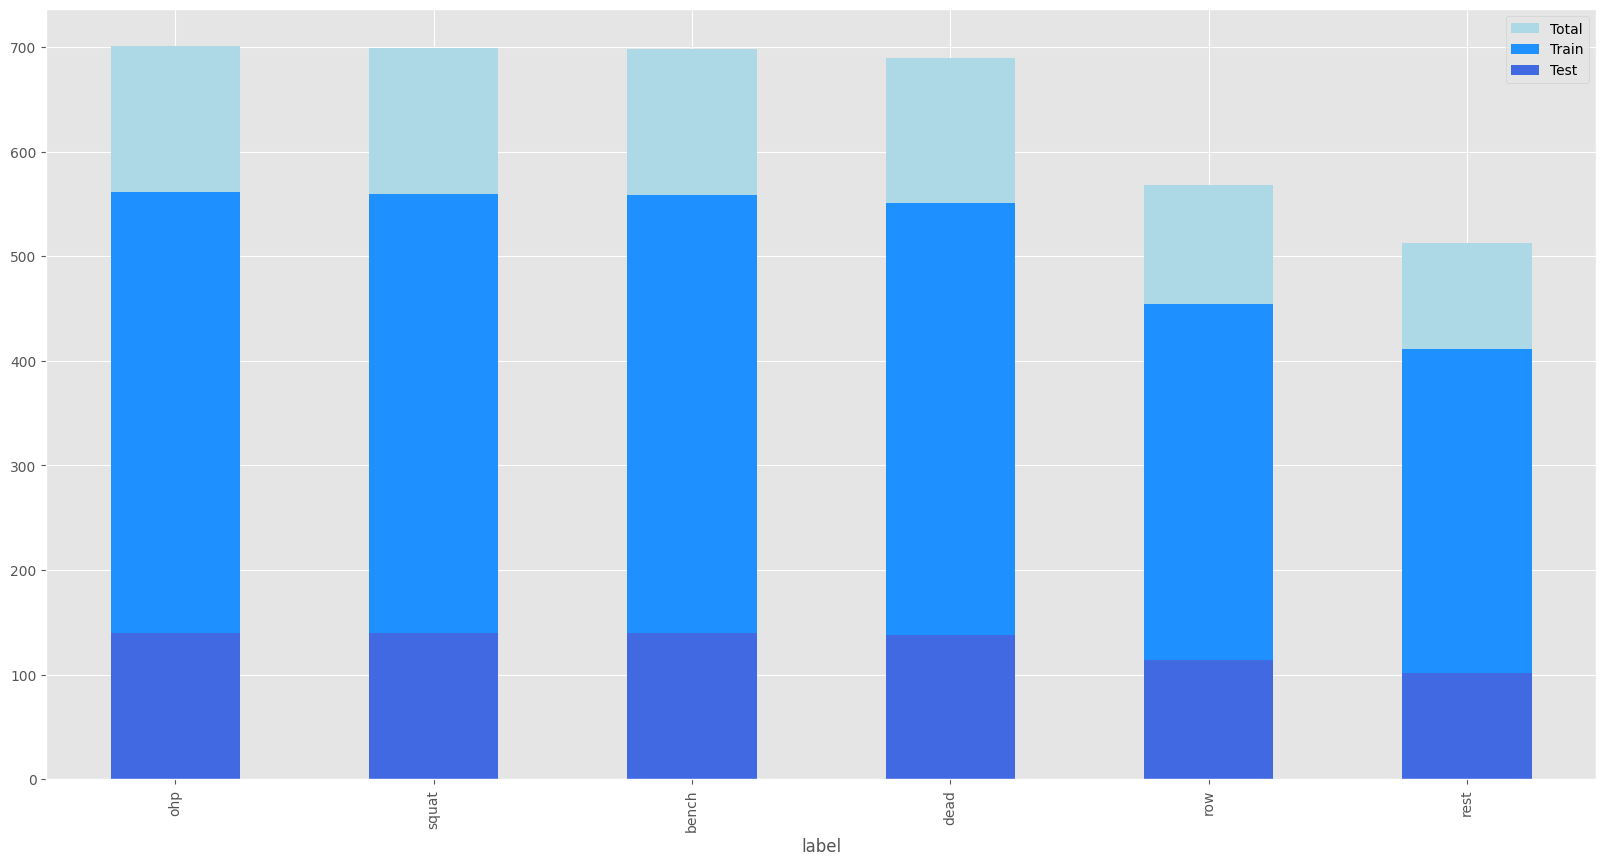

In [15]:

X = df_train.drop(columns=["label"])
y = df_train["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
df_train["label"].value_counts().plot(
    kind="bar", ax=ax, color="lightblue", label="Total"
)
y_train.value_counts().plot(kind="bar", ax=ax, color="dodgerblue", label="Train")
y_test.value_counts().plot(kind="bar", ax=ax, color="royalblue", label="Test")
plt.legend()
plt.show()

In [16]:


# --------------------------------------------------------------
# Perform forward feature selection using simple decision tree
# --------------------------------------------------------------

basic_features = ["acc_x", "acc_y", "acc_z", "gyr_x", "gyr_y", "gyr_z"]
square_features = ["acc_r", "gyr_r"]
pca_features = ["pca_1", "pca_2", "pca_3"]
time_features = [f for f in df_train.columns if "_temp_" in f]
freq_features = [f for f in df_train.columns if ("_freq" in f) or ("_pse" in f)]
cluster_features = ["cluster"]

print("Basic features:", len(basic_features))
print("Square features:", len(square_features))
print("PCA features:", len(pca_features))
print("Time features:", len(time_features))
print("Frequency features:", len(freq_features))
print("Cluster features:", len(cluster_features))

feature_set_1 = list(set(basic_features))
feature_set_2 = list(set(basic_features + square_features + pca_features))
feature_set_3 = list(set(feature_set_2 + time_features))
feature_set_4 = list(set(feature_set_3 + freq_features + cluster_features))


Basic features: 6
Square features: 2
PCA features: 3
Time features: 16
Frequency features: 88
Cluster features: 1


0
1
2
3
4
5
6
7
8
9


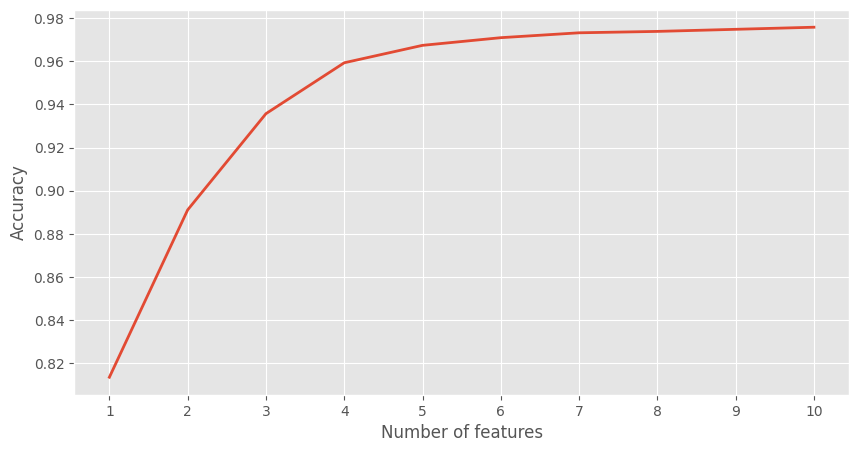

In [18]:

# Perform forward feature selection using simple decision

# --------------------------------------------------------------
# Grid search for best hyperparameters and model selection
# --------------------------------------------------------------

learner = ClassificationAlgorithms()

max_features = 10
selected_features, ordered_features, ordered_scores = learner.forward_selection(
    max_features, X_train, y_train
)

plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, max_features + 1, 1), ordered_scores)
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1, max_features + 1, 1))
plt.show()


In [20]:
selected_features, ordered_features, ordered_scores

(['gyr_r_freq_0.0_Hz_ws_14',
  'acc_z_temp_std_ws_5',
  'acc_r_freq_0.0_Hz_ws_14',
  'gyr_z_temp_std_ws_5',
  'acc_y_temp_std_ws_5',
  'acc_x_freq_1.071_Hz_ws_14',
  'gyr_z_freq_1.429_Hz_ws_14',
  'acc_z_freq_weighted',
  'acc_z_freq_1.071_Hz_ws_14',
  'gyr_z_freq_0.0_Hz_ws_14'],
 ['gyr_r_freq_0.0_Hz_ws_14',
  'acc_z_temp_std_ws_5',
  'acc_r_freq_0.0_Hz_ws_14',
  'gyr_z_temp_std_ws_5',
  'acc_y_temp_std_ws_5',
  'acc_x_freq_1.071_Hz_ws_14',
  'gyr_z_freq_1.429_Hz_ws_14',
  'acc_z_freq_weighted',
  'acc_z_freq_1.071_Hz_ws_14',
  'gyr_z_freq_0.0_Hz_ws_14'],
 [0.8135100193923723,
  0.8910795087265676,
  0.9356819650937298,
  0.9592760180995475,
  0.9673561732385262,
  0.9709114414996768,
  0.9731738849385908,
  0.9738202973497091,
  0.9747899159663865,
  0.975759534583064])

Feature set: 0
	Training neural network, 0


/opt/anaconda3/envs/tracking-barbell-exercises/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 1
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 2
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 3
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 4
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes


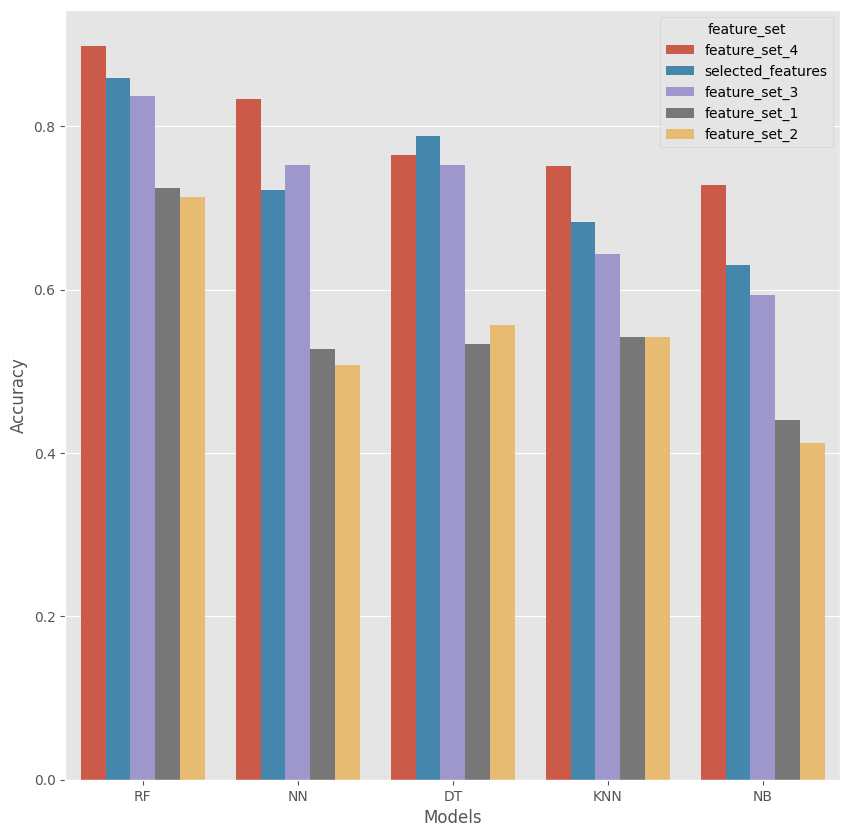

In [21]:

# --------------------------------------------------------------
# Create a grouped bar plot to compare the results
# --------------------------------------------------------------

possible_feature_sets = [
    feature_set_1,
    feature_set_2,
    feature_set_3,
    feature_set_4,
    selected_features,
]


feature_names = [
    "feature_set_1",
    "feature_set_2",
    "feature_set_3",
    "feature_set_4",
    "selected_features",
]

iterations = 1
score_df = pd.DataFrame()


for i, f in zip(range(len(possible_feature_sets)), feature_names):
    print("Feature set:", i)
    selected_train_X = X_train[possible_feature_sets[i]]
    selected_test_X = X_test[possible_feature_sets[i]]

    # First run non deterministic classifiers to average their score.
    performance_test_nn = 0
    performance_test_rf = 0

    for it in range(0, iterations):
        print("\tTraining neural network,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.feedforward_neural_network(
            selected_train_X,
            y_train,
            selected_test_X,
            gridsearch=False,
        )
        performance_test_nn += accuracy_score(y_test, class_test_y)

        print("\tTraining random forest,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.random_forest(
            selected_train_X, y_train, selected_test_X, gridsearch=True
        )
        performance_test_rf += accuracy_score(y_test, class_test_y)

    performance_test_nn = performance_test_nn / iterations
    performance_test_rf = performance_test_rf / iterations

    # And we run our deterministic classifiers:
    print("\tTraining KNN")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.k_nearest_neighbor(
        selected_train_X, y_train, selected_test_X, gridsearch=True
    )
    performance_test_knn = accuracy_score(y_test, class_test_y)

    print("\tTraining decision tree")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.decision_tree(
        selected_train_X, y_train, selected_test_X, gridsearch=True
    )
    performance_test_dt = accuracy_score(y_test, class_test_y)

    print("\tTraining naive bayes")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.naive_bayes(selected_train_X, y_train, selected_test_X)

    performance_test_nb = accuracy_score(y_test, class_test_y)

    # Save results to dataframe
    models = ["NN", "RF", "KNN", "DT", "NB"]
    new_scores = pd.DataFrame(
        {
            "model": models,
            "feature_set": f,
            "accuracy": [
                performance_test_nn,
                performance_test_rf,
                performance_test_knn,
                performance_test_dt,
                performance_test_nb,
            ],
        }
    )
    score_df = pd.concat([score_df, new_scores])

score_df.sort_values(by="accuracy", ascending=False, inplace=True)

plt.figure(figsize=(10, 10))
sns.barplot(x="model", y="accuracy", hue="feature_set", data=score_df)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()


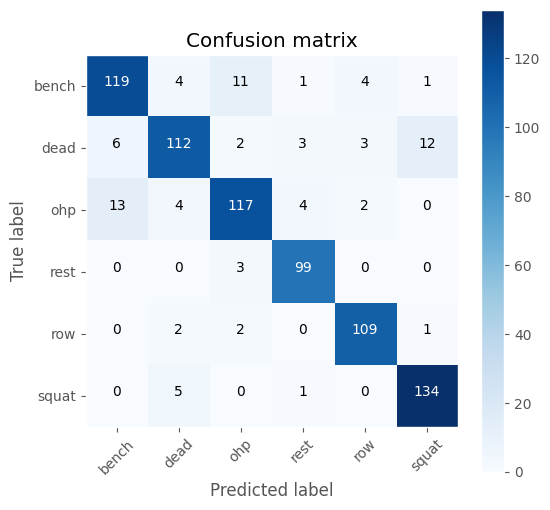

In [22]:

# --------------------------------------------------------------
# Select best model and evaluate results
# --------------------------------------------------------------


(
    class_train_y,
    class_test_y,
    class_train_prob_y,
    class_test_prob_y,
) = learner.random_forest(
    X_train[feature_set_4], y_train, X_test[feature_set_4], gridsearch=True
)

accuracy_scores = accuracy_score(y_test, class_test_y)

classes = class_test_prob_y.columns
cm = confusion_matrix(y_test, class_test_y, labels=classes)


# create confusion matrix for cm
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()

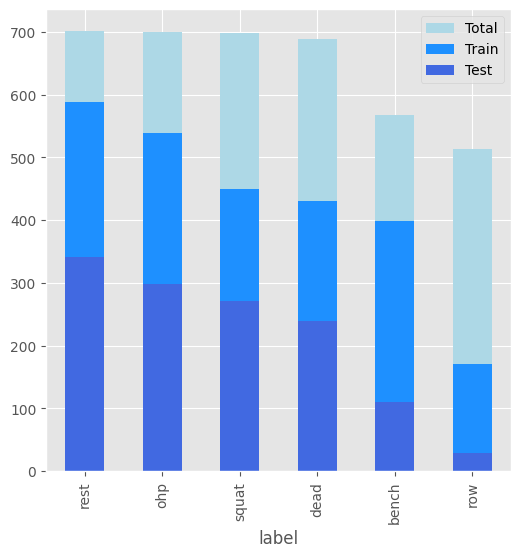

In [23]:

# --------------------------------------------------------------
# Select train and test data based on participant
# --------------------------------------------------------------

participant_df = df.drop(columns=["category", "set", "set'"])
X_train = participant_df.query("participant != 'A'").drop(columns=["label"])
y_train = participant_df.query("participant != 'A'")["label"]
X_test = participant_df.query("participant == 'A'").drop(columns=["label"])
y_test = participant_df.query("participant == 'A'")["label"]
X_train = X_train.drop(columns=["participant"])
X_test = X_test.drop(columns=["participant"])


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
df_train["label"].value_counts().plot(
    kind="bar", ax=ax, color="lightblue", label="Total"
)
y_train.value_counts().plot(kind="bar", ax=ax, color="dodgerblue", label="Train")
y_test.value_counts().plot(kind="bar", ax=ax, color="royalblue", label="Test")
plt.legend()
plt.show()


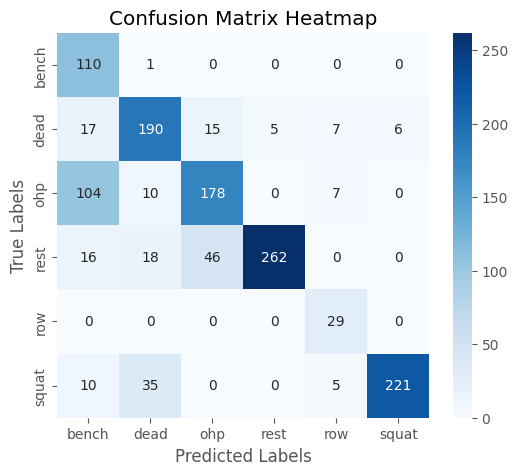

In [24]:

# --------------------------------------------------------------
# Use best model again and evaluate results
# --------------------------------------------------------------


(
    class_train_y,
    class_test_y,
    class_train_prob_y,
    class_test_prob_y,
) = learner.random_forest(
    X_train[feature_set_4], y_train, X_test[feature_set_4], gridsearch=True
)


accuracy_scores = accuracy_score(y_test, class_test_y)

classes = class_test_prob_y.columns
cm = confusion_matrix(y_test, class_test_y, labels=classes)


plt.figure(figsize=(6, 5))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes
)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:

# --------------------------------------------------------------
# Try a simpler model with the selected features
# --------------------------------------------------------------
